In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- Start	: A data em que os dados começam a ser registrados.
- End: A data em que os dados terminam.
- Open: O preço de abertura do Bitcoin no início do dia.
- High: O preço mais alto atingido pelo Bitcoin durante o dia.
- Baixo: O preço mais baixo atingido pelo Bitcoin durante o dia.
- Low: O preço de fechamento no final do dia.
- Close: A quantidade total de Bitcoin negociada durante o dia.
- Market Cap: O valor total de mercado do Bitcoin no final do dia.

In [2]:
cotacao = pd.read_csv("bitcoin_2010-07-27_2024-04-25.csv", sep=",")

cotacao.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


In [3]:
cotacao.shape

(5021, 8)

In [4]:
cotacao.dtypes

Start          object
End            object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object

Transformando as colunas 'Start' e 'End' em colunas do tipo datatime

In [5]:
cotacao['Start'] = pd.to_datetime(cotacao['Start'])
cotacao['End'] = pd.to_datetime(cotacao['End'])

In [6]:
cotacao.dtypes

Start         datetime64[ns]
End           datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

https://g1.globo.com/economia/noticia/2022/05/10/bitcoin-em-queda-entenda-a-desvalorizacao-das-criptomoedas.ghtml

Pegando os dados a partir de 2021, ano onde aconteceu a maior alta (novembro) até o momento da noticia.

In [7]:
dados = cotacao.loc[cotacao['Start'].dt.year >= 2021]
dados.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11
1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11
1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11
1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11
1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11


In [8]:
dados.shape

(1210, 8)

O cálculo de 'Liquid Movement' resultará na diferença entre o preço de fechamento e o preço de abertura. Essa diferença representa o movimento líquido do preço durante o período considerado. Se o resultado for positivo, indica que o preço de fechamento foi maior que o preço de abertura, sugerindo um aumento no preço durante o período. Se for negativo, indica que o preço de fechamento foi menor que o preço de abertura, sugerindo uma queda no preço durante o período.

Portanto, na coluna 'Variation Perc', essa diferença será dividida pelo preço de abertura e multiplicada por 100 para expressar a mudança percentual em relação ao preço de abertura. Isso nos dá uma medida da variação percentual do preço durante o período considerado.

In [9]:
#dados.loc[:, 'Liquid Movement'] = dados['Close'] - dados['Open']
#dados.loc[:, 'Variation'] = dados['Liquid Movement'] / dados['Open']
#dados.loc[:, 'Variation Perc'] = round(dados['Variation'] * 100, 2)

#dados.head()

## Variação do preço de fechamento do Bitcoin ao longo do tempo

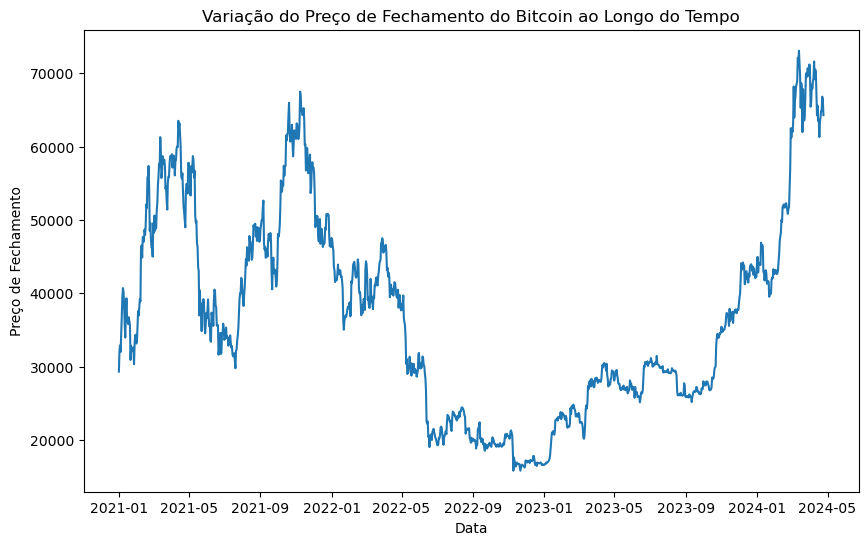

In [10]:
dados.set_index('Start', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(dados['Close'])
plt.title('Variação do Preço de Fechamento do Bitcoin ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()

## Volume médio diário de negociações de Bitcoin por ano

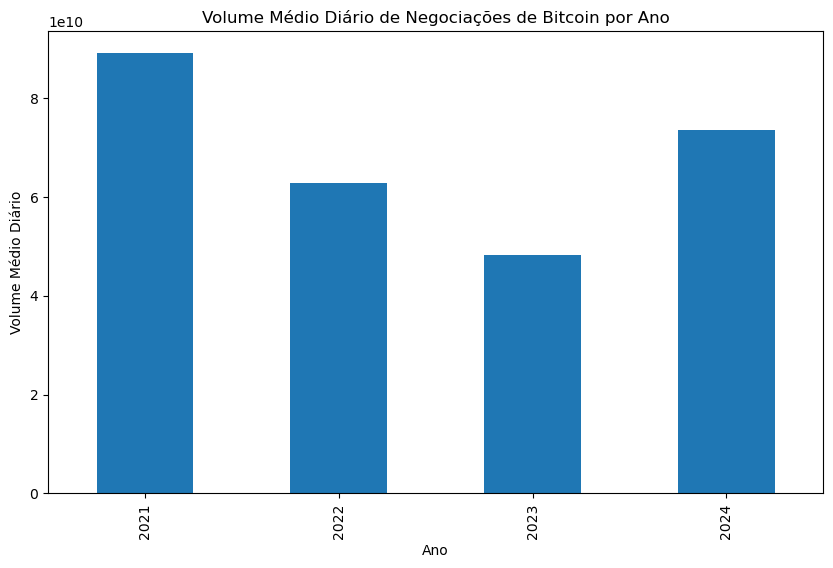

In [11]:
dados = cotacao.loc[cotacao['Start'].dt.year >= 2021].copy()

dados.loc[:, 'Year'] = dados['Start'].dt.year
media_diaria_anual = dados.groupby('Year')['Volume'].mean()

plt.figure(figsize=(10, 6))
media_diaria_anual.plot(kind='bar')
plt.title('Volume Médio Diário de Negociações de Bitcoin por Ano')
plt.xlabel('Ano')
plt.ylabel('Volume Médio Diário')
plt.show()

## Dias com maior variação percentual no preço do Bitcoin

In [12]:
dados['pct_change'] = dados['Close'].pct_change() * 100
top_variacoes = dados.nlargest(10, 'pct_change')

top_variacoes [['Start', 'pct_change']]

,Start,pct_change
682,2022-06-12,18.639706
533,2022-11-08,17.348275
1072,2021-05-18,16.349486
1190,2021-01-20,15.354090
1039,2021-06-20,12.788956
1079,2021-05-11,12.359545
961,2021-09-06,12.280294
717,2022-05-08,11.756333
825,2022-01-20,11.739554
1157,2021-02-22,11.623920


## Tendência sazonal nos preços do Bitcoin

OBS: Fazer por ano

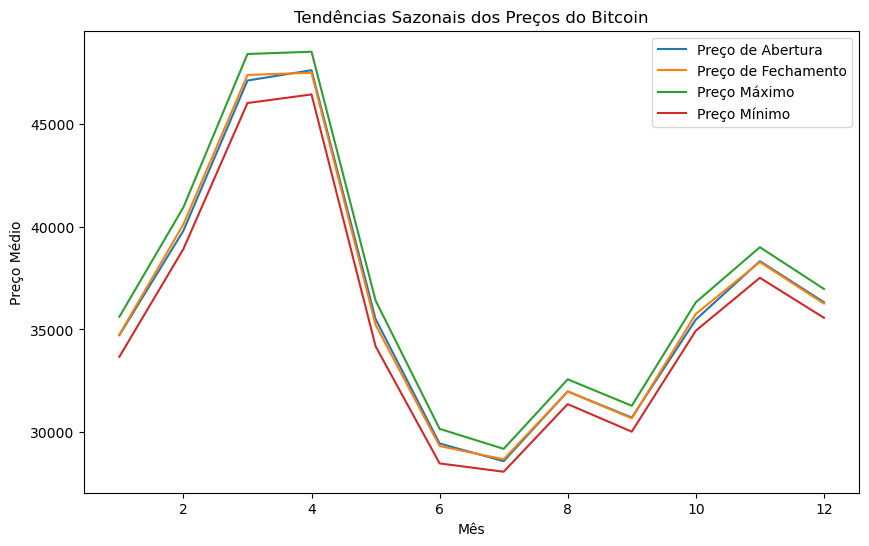

In [13]:
dados['Mes'] = dados['Start'].dt.month
monthly_trends = dados.groupby('Mes')[['Open', 'Close', 'High', 'Low']].mean()

monthly_trends.plot(figsize=(10,6))
plt.title('Tendências Sazonais dos Preços do Bitcoin')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.legend(['Preço de Abertura', 'Preço de Fechamento', 'Preço Máximo', 'Preço Mínimo'])
plt.show()

## Correlações

Correlação entre valor de mercado e volume de negociações: 0.42271708423433274


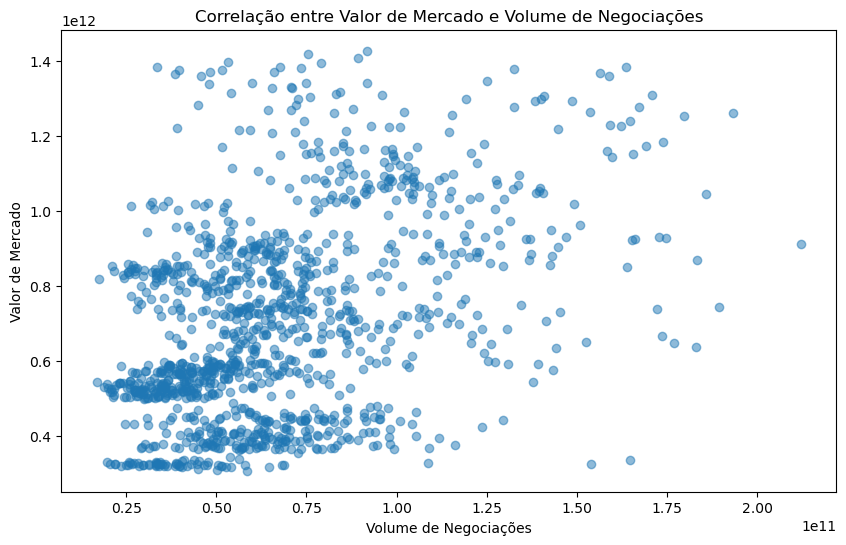

In [14]:
correlation = dados['Market Cap'].corr(dados['Volume'])
print(f'Correlação entre valor de mercado e volume de negociações: {correlation}')

plt.figure(figsize=(10,6))
plt.scatter(dados['Volume'], dados['Market Cap'], alpha=0.5)
plt.title('Correlação entre Valor de Mercado e Volume de Negociações')
plt.xlabel('Volume de Negociações')
plt.ylabel('Valor de Mercado')
plt.show()

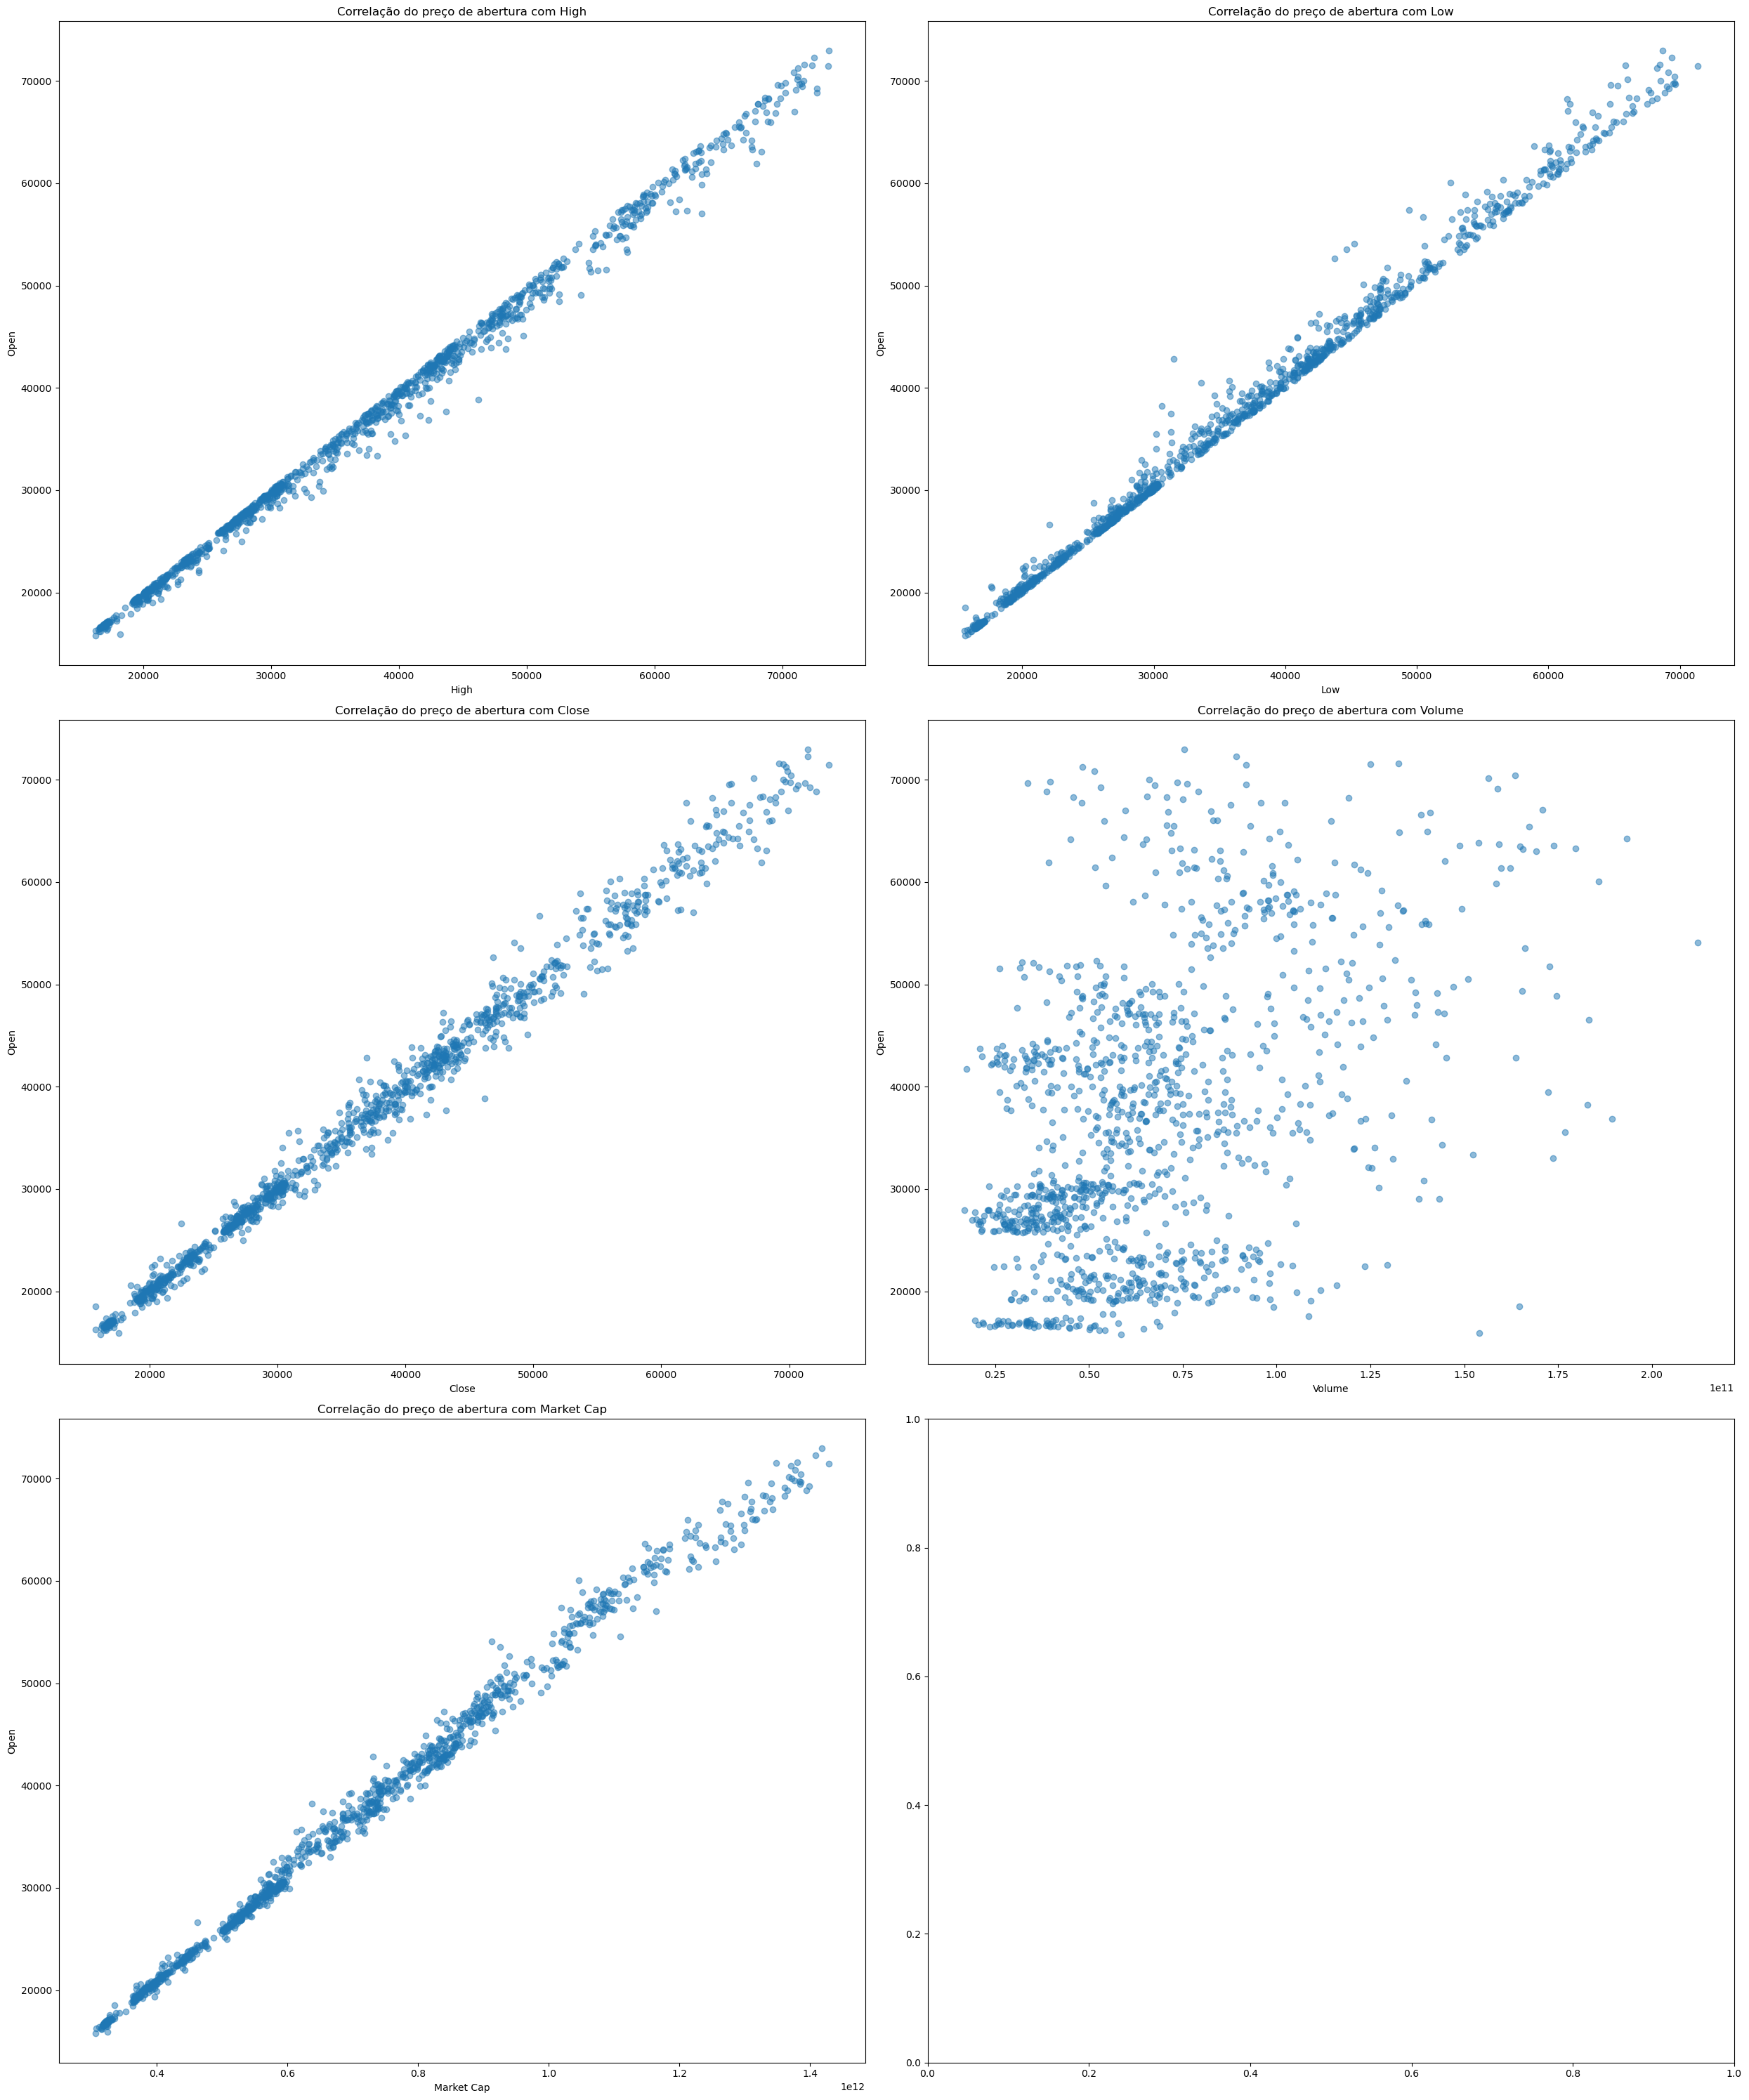

In [15]:
colunas = ['High', 'Low', 'Close', 'Volume', 'Market Cap']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(3, 2, figsize=(25, 30))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    correlation = dados['Open'].corr(dados[coluna])
    axs[i].scatter(dados[coluna], dados['Open'], alpha=0.5)
    axs[i].set_title(f'Correlação do preço de abertura com {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Open')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

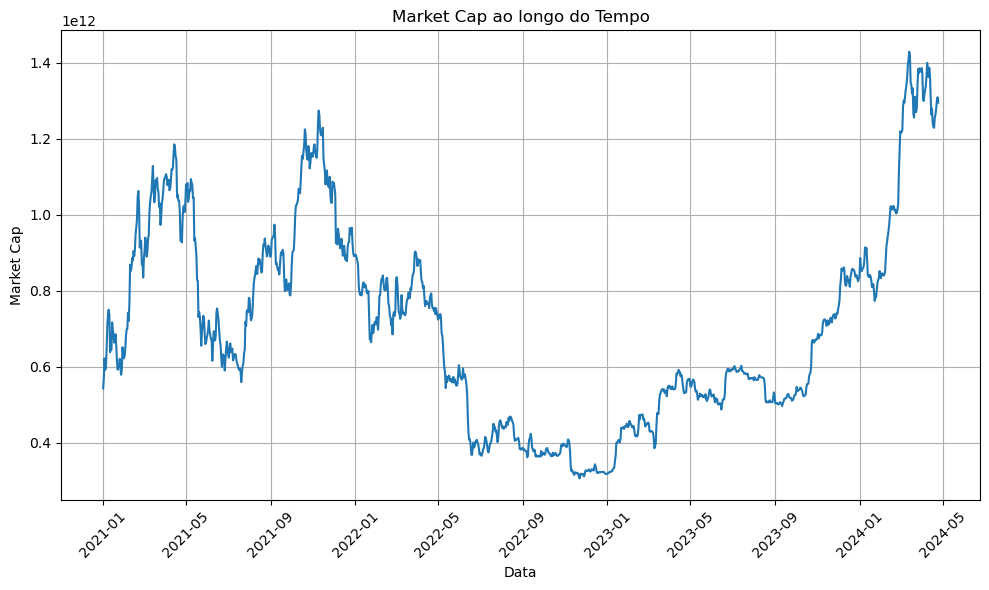

In [16]:
dados = dados.sort_values(by='Start')

plt.figure(figsize=(10, 6))
plt.plot(dados['Start'], dados['Market Cap'], linestyle='-')
plt.title('Market Cap ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Market Cap')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

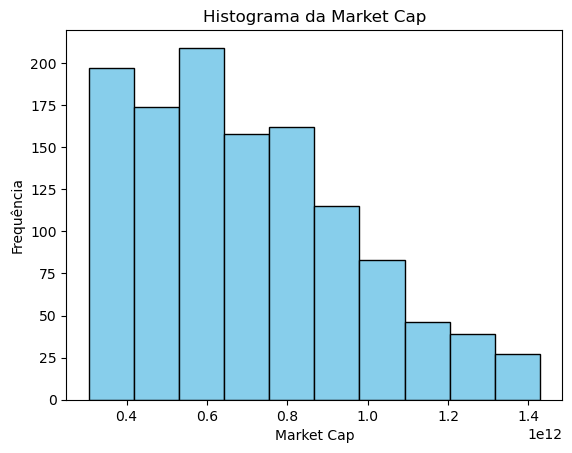

In [17]:
plt.hist(dados['Market Cap'], bins=10, color='skyblue', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Market Cap')
plt.ylabel('Frequência')
plt.title('Histograma da Market Cap')

# Mostrar o histograma
plt.show()

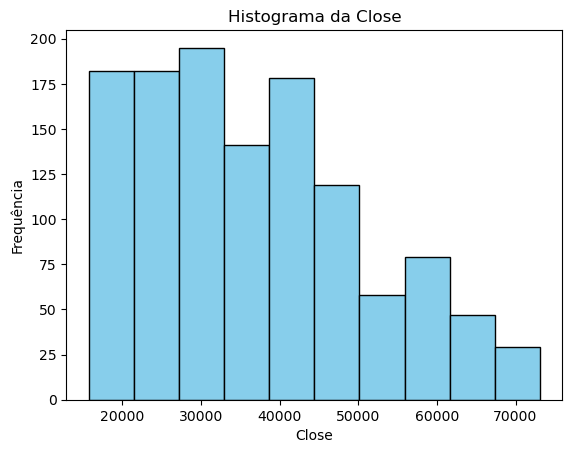

In [18]:
plt.hist(dados['Close'], bins=10, color='skyblue', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Close')
plt.ylabel('Frequência')
plt.title('Histograma da Close')

# Mostrar o histograma
plt.show()

In [19]:
# dados = dados.sort_values(by='Start')

# plt.figure(figsize=(9, 6))
# plt.plot(dados['Start'], dados['Liquid Movement'], linestyle='-')
# plt.title('Liquid Movement ao longo do Tempo')
# plt.xlabel('Data')
# plt.ylabel('Liquid Movement')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [20]:
# dados = dados.sort_values(by='Start')

# plt.figure(figsize=(10, 6))
# plt.plot(dados['Start'], dados['Variation Perc'], linestyle='-')
# plt.title('Variation Perc ao longo do Tempo')
# plt.xlabel('Data')
# plt.ylabel('Variation Perc')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [21]:
medidas_mensais = pd.DataFrame(columns=['Month_Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

for ano in range(2021, 2024):
    ano_especifico = dados[dados['Start'].dt.year == ano]
    for mes in range(1, 13):
        mes_especifico = ano_especifico[ano_especifico['Start'].dt.month == mes]
        data_linha = {
            'Month_Year': f'{mes}/{ano}',
            'Open': mes_especifico['Open'].mean(),
            'High': mes_especifico['High'].max(),
            'Low': mes_especifico['Low'].min(),
            'Close': mes_especifico['Close'].mean(),
            'Volume': mes_especifico['Volume'].mean(),
            'Market Cap': mes_especifico['Market Cap'].mean()
        }
        
        medidas_mensais = pd.concat([medidas_mensais, pd.DataFrame([data_linha])], ignore_index=True)

medidas_mensais.head()

C:\Users\Eandro\AppData\Local\Temp\ipykernel_3184\4177508220.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  medidas_mensais = pd.concat([medidas_mensais, pd.DataFrame([data_linha])], ignore_index=True)


,Month_Year,Open,High,Low,Close,Volume,Market Cap
0,1/2021,34605.972892,41849.906402,28718.621788,34745.621473,1.149071e+11,6.422212e+11
1,2/2021,45858.388539,58301.831486,32402.294129,46263.751560,1.275584e+11,8.577881e+11
2,3/2021,54416.293228,61662.205960,45015.584231,54896.214509,1.091862e+11,1.019014e+12
3,4/2021,57102.641257,64816.101874,47199.806671,57054.780218,1.173309e+11,1.066556e+12
4,5/2021,47077.988658,59447.870498,31282.720370,46445.596663,9.882945e+10,8.778953e+11


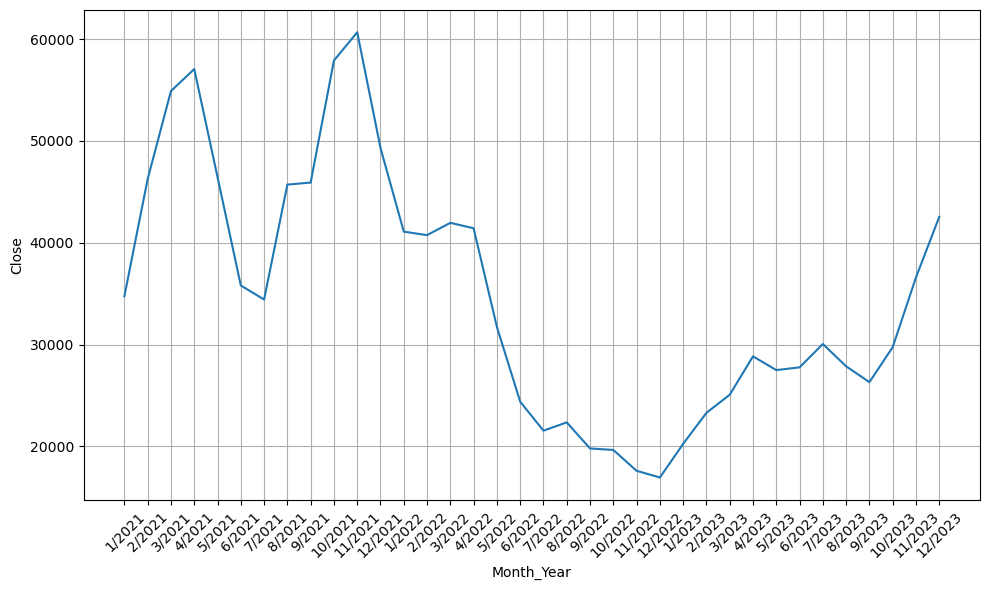

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(medidas_mensais['Month_Year'], medidas_mensais['Close'], linestyle='-')
plt.xlabel('Month_Year')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
medidas_semestrais = pd.DataFrame(columns=['Semester_Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

for ano in range(2021, 2024):
    ano_especifico = dados[dados['Start'].dt.year == ano]
    for semestre in range(1, 3):  # Loop de 1 a 2 para representar os dois semestres
        mes_inicial = 6 * (semestre - 1) + 1  # Primeiro mês do semestre (1º semestre: 1, 2º semestre: 7)
        mes_final = mes_inicial + 5  # Último mês do semestre (1º semestre: 6, 2º semestre: 12)
       
        semestre_especifico = ano_especifico[(ano_especifico['Start'].dt.month >= mes_inicial) & (ano_especifico['Start'].dt.month <= mes_final)]
        
        data_linha = {
            'Semester_Year': f'{semestre}/{ano}',
            'Open': semestre_especifico['Open'].mean(),
            'High': semestre_especifico['High'].max(),
            'Low': semestre_especifico['Low'].min(),
            'Close': semestre_especifico['Close'].mean(),
            'Volume': semestre_especifico['Volume'].mean(),
            'Market Cap': semestre_especifico['Market Cap'].mean()
        }
        
        medidas_semestrais = pd.concat([medidas_semestrais, pd.DataFrame([data_linha])], ignore_index=True)

medidas_semestrais.head(10)


C:\Users\Eandro\AppData\Local\Temp\ipykernel_3184\1425903275.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  medidas_semestrais = pd.concat([medidas_semestrais, pd.DataFrame([data_linha])], ignore_index=True)


,Semester_Year,Open,High,Low,Close,Volume,Market Cap
0,1/2021,45819.709881,64816.101874,28718.621788,45855.285002,1.054752e+11,8.553863e+11
1,2/2021,48873.685734,68769.955369,29354.710000,48936.846258,7.311051e+10,9.206804e+11
2,1/2022,37000.905504,48129.973866,17697.702497,36866.681691,6.648244e+10,7.011985e+11
3,2/2022,19673.982640,25136.017300,15598.495100,19656.011609,5.947475e+10,3.768243e+11
4,1/2023,25375.528605,31392.970000,16507.390600,25452.906872,5.126235e+10,4.907866e+11
5,2/2023,32122.965054,44614.010000,25003.540000,32190.642717,4.522787e+10,6.270051e+11


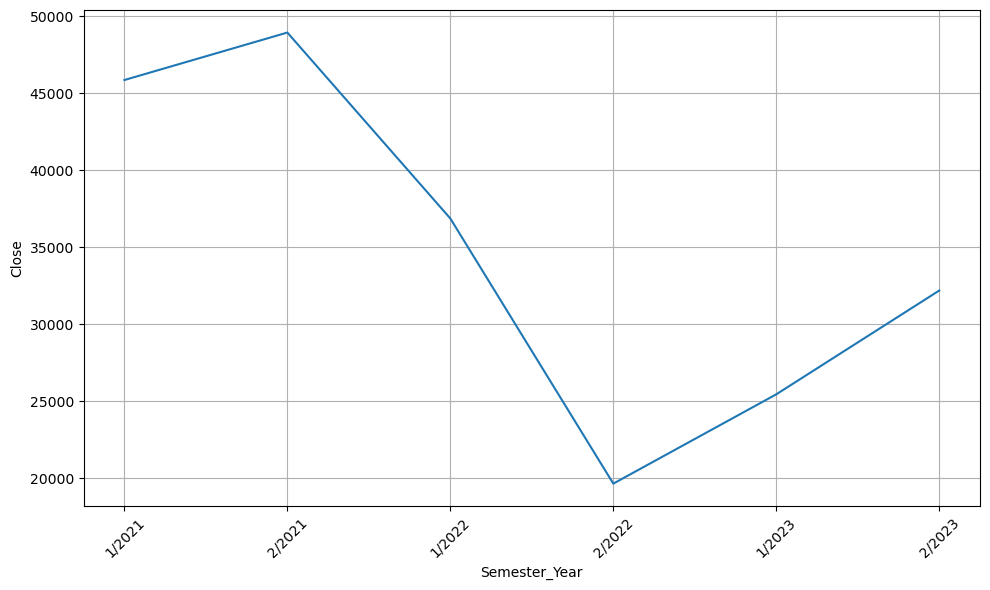

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(medidas_semestrais['Semester_Year'], medidas_semestrais['Close'], linestyle='-')
plt.xlabel('Semester_Year')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
medidas_anuais = pd.DataFrame(columns=['Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

for ano in range(2021, 2024):
    ano_especifico = dados[dados['Start'].dt.year == ano]
  
        
    data_linha = {
        'Year': f'{ano}',
        'Open': ano_especifico['Open'].mean(),
        'High': ano_especifico['High'].max(),
        'Low': ano_especifico['Low'].min(),
        'Close': ano_especifico['Close'].mean(),
        'Volume': ano_especifico['Volume'].mean(),
        'Market Cap': ano_especifico['Market Cap'].mean()
    }
        
    medidas_anuais = pd.concat([medidas_anuais, pd.DataFrame([data_linha])], ignore_index=True)

medidas_anuais.head()

C:\Users\Eandro\AppData\Local\Temp\ipykernel_3184\893010386.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  medidas_anuais = pd.concat([medidas_anuais, pd.DataFrame([data_linha])], ignore_index=True)


,Year,Open,High,Low,Close,Volume,Market Cap
0,2021,47359.248393,68769.955369,28718.621788,47408.729580,8.915983e+10,8.883017e+11
1,2022,28266.237540,48129.973866,15598.495100,28190.617869,6.294979e+10,5.376783e+11
2,2023,28776.976020,44614.010000,16507.390600,28849.464120,4.822031e+10,5.594556e+11


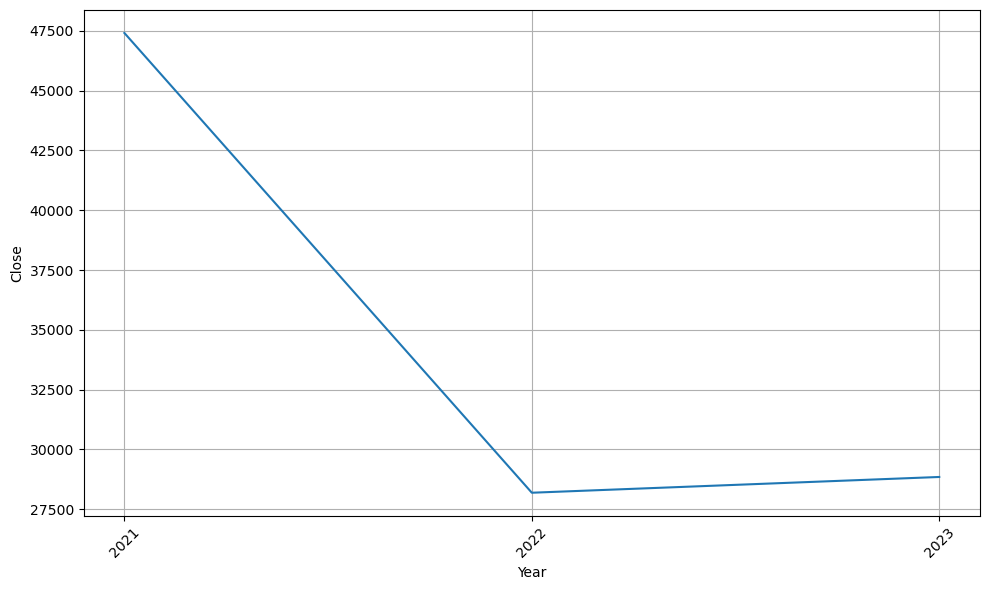

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(medidas_anuais['Year'], medidas_anuais['Close'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

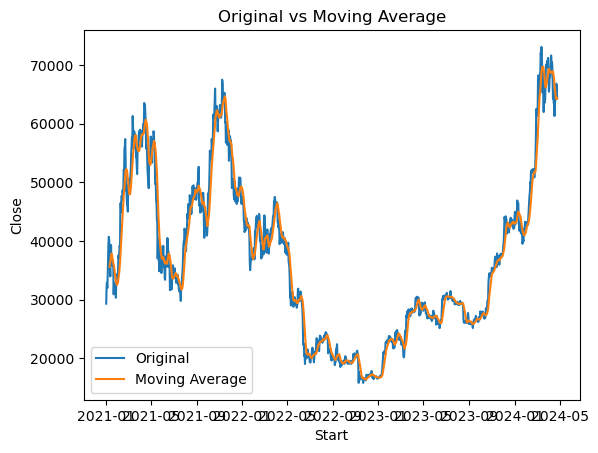

In [27]:
# Calcular a média móvel com uma janela de 10 dias
dados['Media_movel'] = dados['Close'].rolling(window=10).mean()

# Plotar os dados originais e a média móvel
plt.plot(dados['Start'], dados['Close'], label='Original')
plt.plot(dados['Start'], dados['Media_movel'], label='Moving Average')
plt.xlabel('Start')
plt.ylabel('Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [28]:
dados['Close'].min()

15779.971701749892

In [29]:
menor_valor = dados['Close'].idxmin()

linha = dados.loc[menor_valor]
linha

Start          2022-11-21 00:00:00
End            2022-11-22 00:00:00
Open                    16286.8064
High                    16286.8064
Low                     15598.4951
Close                 15779.971702
Volume          50201276579.555557
Market Cap     308166351834.299133
Year                          2022
pct_change               -2.441958
Mes                             11
Media_movel           16554.055288
Name: 520, dtype: object

In [30]:
filtrado = dados.loc[dados['Start'] >= linha['Start']]

filtrado.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,pct_change,Mes,Media_movel
520,2022-11-21,2022-11-22,16286.806400,16286.8064,15598.495100,15779.971702,5.020128e+10,3.081664e+11,2022,-2.441958,11,16554.055288
519,2022-11-22,2022-11-23,15781.030076,16260.7217,15666.274500,16174.957400,5.861563e+10,3.063924e+11,2022,-2.649809,11,16491.331598
518,2022-11-23,2022-11-24,16221.670000,16652.2104,16167.276600,16615.229200,5.419175e+10,3.164517e+11,2022,0.105423,11,16517.854758
517,2022-11-24,2022-11-25,16624.779500,16779.3432,16474.392577,16597.731300,5.131614e+10,3.189791e+11,2022,0.519746,11,16514.564142
516,2022-11-25,2022-11-26,16609.375900,16609.3759,16371.869099,16511.911278,4.053965e+10,3.168598e+11,2022,0.308099,11,16476.262620


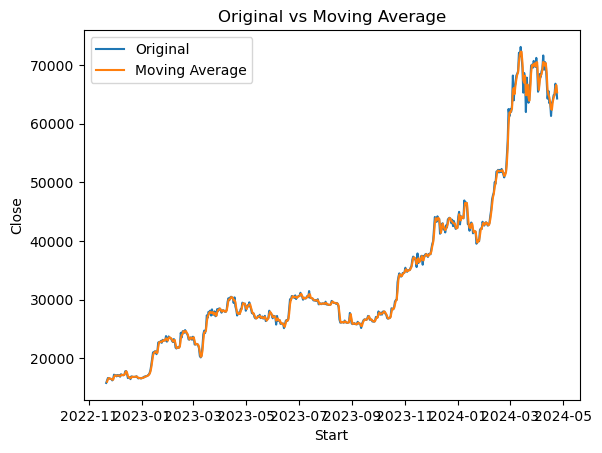

In [31]:
filtrado.loc[:, 'Media_movel'] = filtrado['Close'].rolling(window=2).mean()

plt.plot(filtrado['Start'], filtrado['Close'], label='Original')
plt.plot(filtrado['Start'], filtrado['Media_movel'], label='Moving Average')
plt.xlabel('Start')
plt.ylabel('Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [32]:
dados

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,pct_change,Mes,Media_movel
1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11,2021,-8.702991,1,NaN
1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11,2021,-2.385643,1,NaN
1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11,2021,2.826609,1,NaN
1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,2021,-5.862855,1,NaN
1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11,2021,-7.964016,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-04-20,2024-04-21,63824.060000,65351.330000,63321.190000,64857.990000,1.537410e+11,1.263725e+12,2024,-0.059910,4,64788.775
3,2024-04-21,2024-04-22,64875.750000,65638.740000,64302.470000,64896.870000,1.326574e+11,1.278730e+12,2024,-2.876462,4,64267.257
2,2024-04-22,2024-04-23,64952.020000,67180.030000,64598.000000,66818.890000,1.400725e+11,1.299703e+12,2024,0.651155,4,64228.325
1,2024-04-23,2024-04-24,66761.020000,67174.020000,65884.150000,66386.610000,1.408621e+11,1.308576e+12,2024,3.259457,4,64441.392


In [33]:
dados.reset_index(inplace=True)
dados

,index,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,pct_change,Mes,Media_movel
0,1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11,2021,-8.702991,1,NaN
1,1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11,2021,-2.385643,1,NaN
2,1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11,2021,2.826609,1,NaN
3,1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,2021,-5.862855,1,NaN
4,1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11,2021,-7.964016,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,4,2024-04-20,2024-04-21,63824.060000,65351.330000,63321.190000,64857.990000,1.537410e+11,1.263725e+12,2024,-0.059910,4,64788.775
1206,3,2024-04-21,2024-04-22,64875.750000,65638.740000,64302.470000,64896.870000,1.326574e+11,1.278730e+12,2024,-2.876462,4,64267.257
1207,2,2024-04-22,2024-04-23,64952.020000,67180.030000,64598.000000,66818.890000,1.400725e+11,1.299703e+12,2024,0.651155,4,64228.325
1208,1,2024-04-23,2024-04-24,66761.020000,67174.020000,65884.150000,66386.610000,1.408621e+11,1.308576e+12,2024,3.259457,4,64441.392
